### Data Dictionary

The Mars Craters Study, presents a global database that includes over 300,000 Mars craters 1 km or larger that were created between 4.2 and 3.8 billion years ago during a period of heavy bombardment (i.e. impacts of asteroids, proto-planets, and comets).

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler

import pickle
from pickle import dump, load

from pycaret.classification import *

np.random.seed(0)

pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows',500')
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [3]:
df = pd.read_csv("marscrater_pds.csv")

In [4]:
df

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0
...,...,...,...,...,...,...,...,...,...,...
384338,30-013686,,-67.138,166.562,1.00,0.00,,,,0
384339,30-013687,,-73.986,39.069,1.00,0.00,,,,0
384340,30-013688,,-76.934,5.923,1.00,0.00,,,,0
384341,30-013689,,-79.415,63.528,1.00,0.00,,,,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384343 entries, 0 to 384342
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRATER_ID               384343 non-null  object 
 1   CRATER_NAME             384343 non-null  object 
 2   LATITUDE_CIRCLE_IMAGE   384343 non-null  float64
 3   LONGITUDE_CIRCLE_IMAGE  384343 non-null  float64
 4   DIAM_CIRCLE_IMAGE       384343 non-null  float64
 5   DEPTH_RIMFLOOR_TOPOG    384343 non-null  float64
 6   MORPHOLOGY_EJECTA_1     384343 non-null  object 
 7   MORPHOLOGY_EJECTA_2     384343 non-null  object 
 8   MORPHOLOGY_EJECTA_3     384343 non-null  object 
 9   NUMBER_LAYERS           384343 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 29.3+ MB


In [6]:
df.describe(include='all')

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
count,384343,384343,384343.000000,384343.000000,384343.000000,384343.000000,384343,384343,384343,384343.000000
unique,384343,986,NaN,NaN,NaN,NaN,156,104,29,NaN
top,26-006803,,NaN,NaN,NaN,NaN,,,,NaN
freq,1,383356,NaN,NaN,NaN,NaN,339718,364867,383050,NaN
mean,NaN,NaN,-7.199209,10.128021,3.556686,0.075838,NaN,NaN,NaN,0.064835
std,NaN,NaN,33.608966,96.641592,8.591993,0.221518,NaN,NaN,NaN,0.304889
min,NaN,NaN,-86.700000,-179.997000,1.000000,-0.420000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,-30.935000,-58.829000,1.180000,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,-10.079000,12.740000,1.530000,0.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,17.222500,89.275500,2.550000,0.000000,NaN,NaN,NaN,0.000000


In [7]:
df.shape

(384343, 10)

In [8]:
df.columns

Index(['CRATER_ID', 'CRATER_NAME', 'LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'MORPHOLOGY_EJECTA_1', 'MORPHOLOGY_EJECTA_2', 'MORPHOLOGY_EJECTA_3', 'NUMBER_LAYERS'], dtype='object')

In [9]:
df['CRATER_NAME'].value_counts()

                 383356
M                     2
P                     2
Milford               1
Krishtofovich         1
                  ...  
Morella               1
Timaru                1
Troy                  1
Butte                 1
Vaux                  1
Name: CRATER_NAME, Length: 986, dtype: int64

In [10]:
df['MORPHOLOGY_EJECTA_1'].value_counts()

                        339718
Rd                       24892
SLEPS                     4949
SLERS                     4828
SLEPC                     2552
                         ...  
Rd/SPERS                     1
DLEPC/DLERC/Rd               1
MLERS/MLERS/Rd/MLERS         1
Rd/SLEPC/Rd                  1
RD/SLEPC                     1
Name: MORPHOLOGY_EJECTA_1, Length: 156, dtype: int64

In [11]:
df['MORPHOLOGY_EJECTA_2'].value_counts()

                       364867
HuSL                     6109
HuBL                     4424
SmSL                     2713
HuAm                     1356
                        ...  
Hu/HuSp/SmSp                1
HuSL/SmBL/SmSL              1
HuSL/HuSL/HuBL/HuBL         1
HuAM                        1
SmBL/SmAm                   1
Name: MORPHOLOGY_EJECTA_2, Length: 104, dtype: int64

In [12]:
df['MORPHOLOGY_EJECTA_3'].value_counts()

                                  383050
Pin-Cushion                          349
Small-Crown                          264
Pseudo-Butterfly                     118
Inner is Pin-Cushion                  87
Butterfly                             76
Inner is Small-Crown                  66
Sandbar                               58
Outer is Splash                       56
Pseudo-Small-Crown                    56
Splash                                55
Rectangular                           38
Pseudo-Rectangular                    26
Bumblebee                             18
Inner is Pseudo-Small-Crown            4
Outer is Butterfly                     4
Outer is Pseudo-Butterfly              4
Inner is Butterfly                     2
Small-Crown / Sandbar                  2
Pin-Cushion / Butterfly                1
Middle is Rectangular                  1
Inner is Pseudo-Butterfly              1
Pseudo-Pin-Cushion                     1
Outer is Rectangular                   1
Small-Crown / Ps

In [13]:
df['NUMBER_LAYERS'].value_counts()

0    364612
1     15467
2      3435
3       739
4        85
5         5
Name: NUMBER_LAYERS, dtype: int64

### Data Visualization

### Univariate Data Exploration

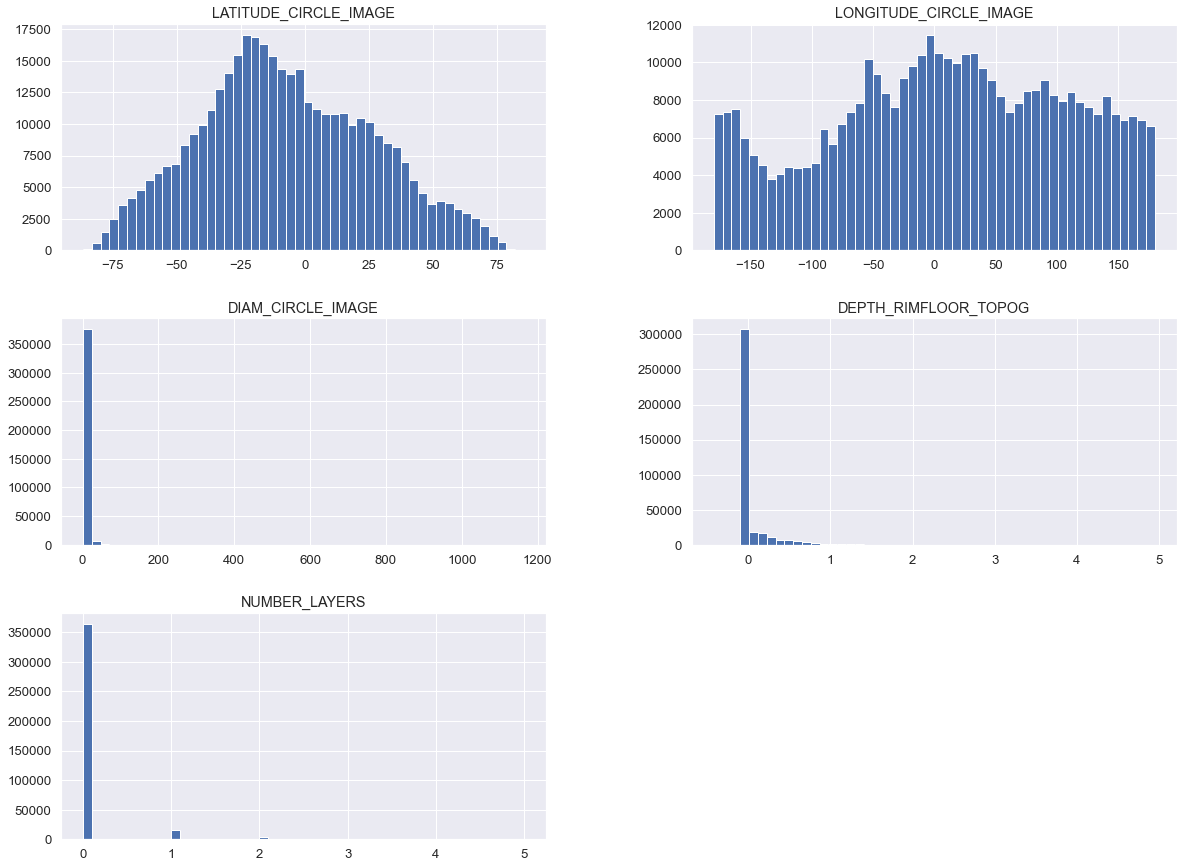

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

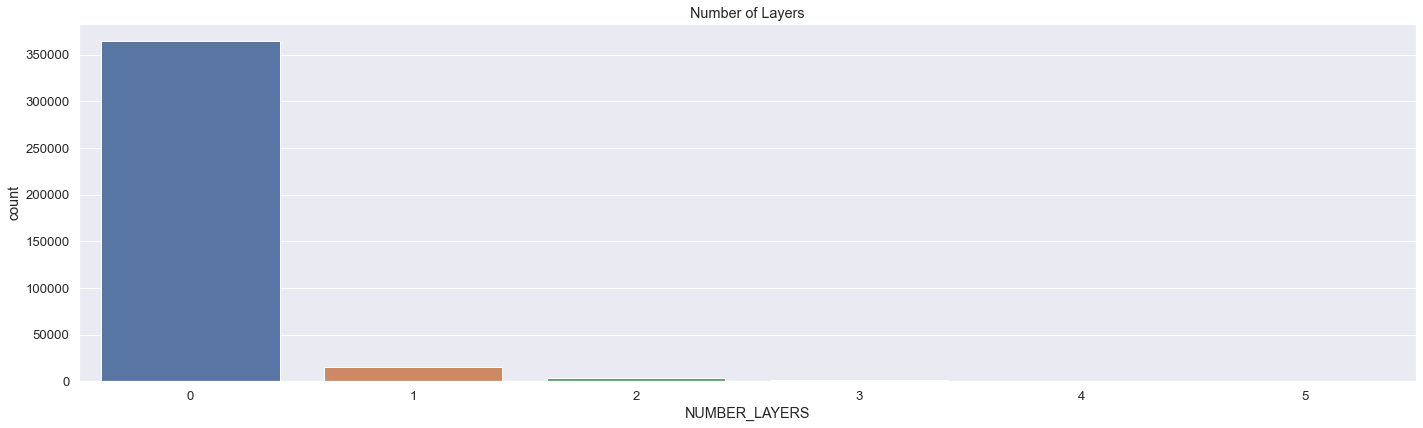

In [15]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("Number of Layers")
sns.countplot(df.NUMBER_LAYERS)

plt.tight_layout()
plt.show()

In [16]:
df.corr()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,NUMBER_LAYERS
LATITUDE_CIRCLE_IMAGE,1.000000,0.064159,-0.057940,-0.042883,0.062959
LONGITUDE_CIRCLE_IMAGE,0.064159,1.000000,0.004251,0.016620,-0.008102
DIAM_CIRCLE_IMAGE,-0.057940,0.004251,1.000000,0.586713,0.135270
DEPTH_RIMFLOOR_TOPOG,-0.042883,0.016620,0.586713,1.000000,0.437325
NUMBER_LAYERS,0.062959,-0.008102,0.135270,0.437325,1.000000


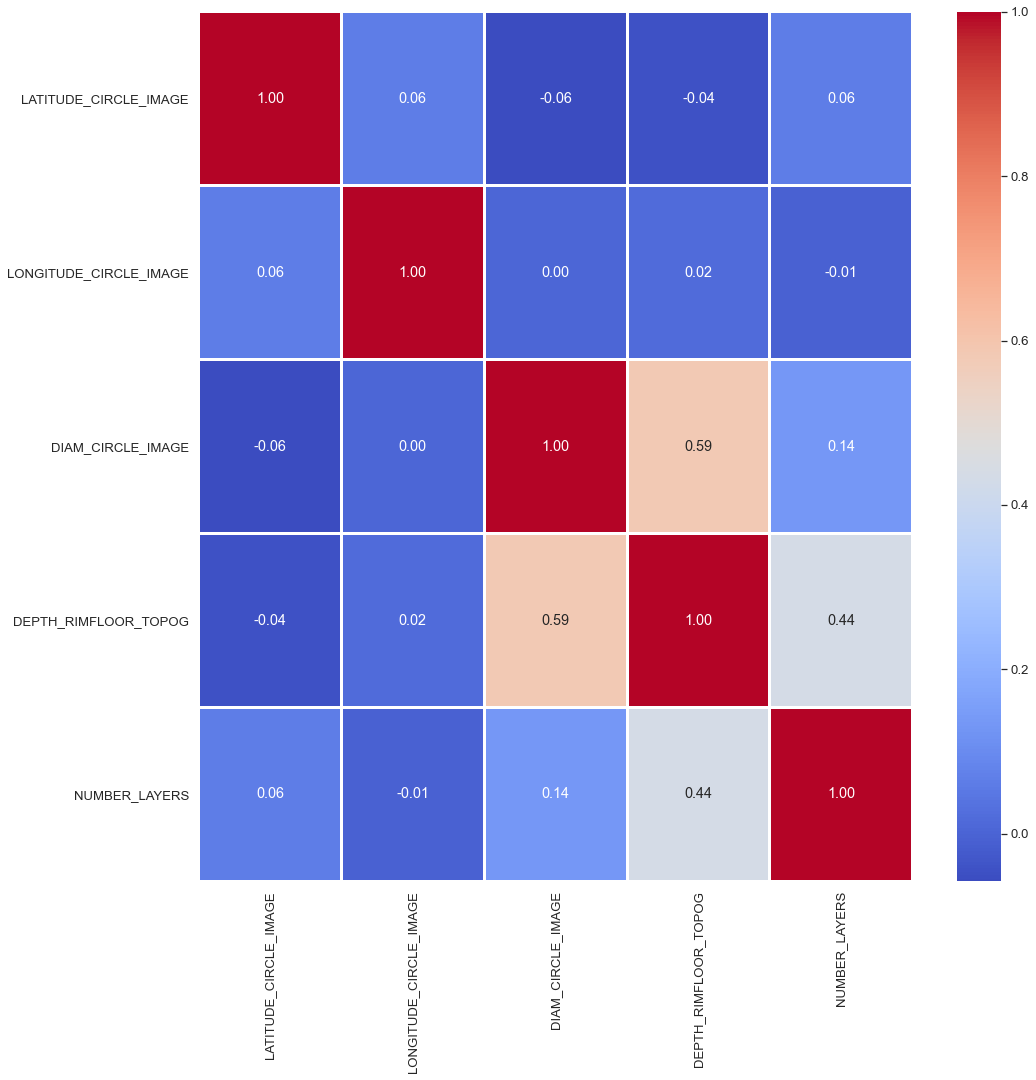

In [17]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

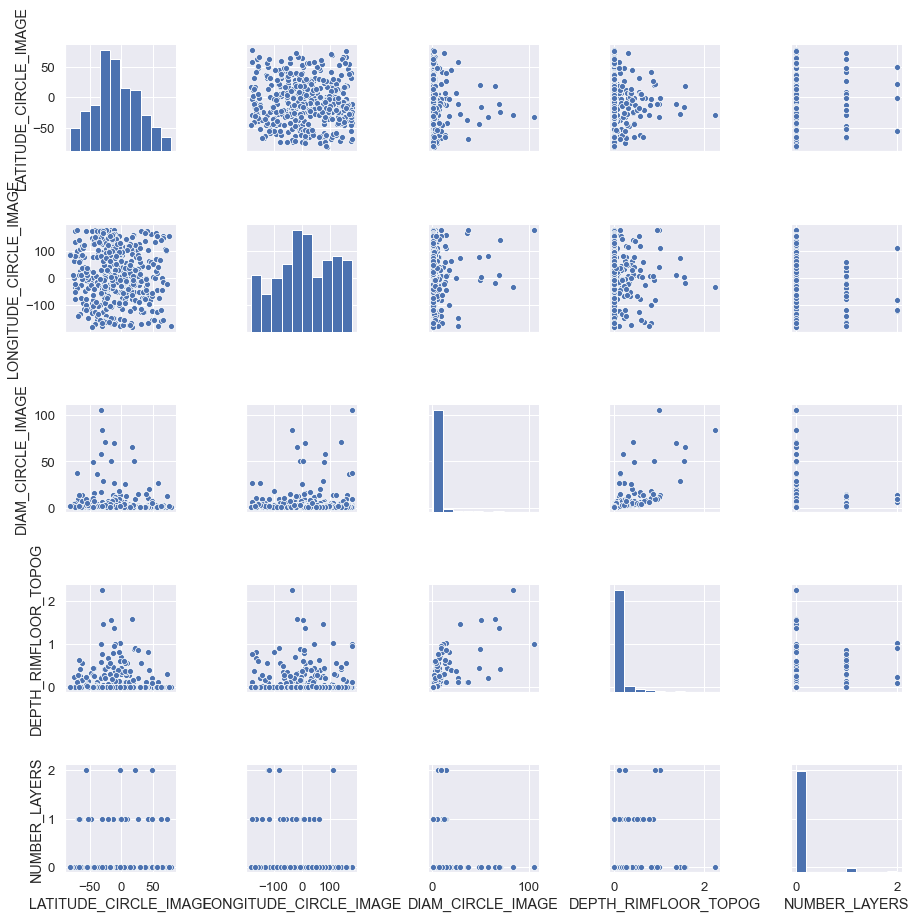

In [18]:
sns.pairplot(df.sample(500))
plt.show()

### Data Preprocessing

### Treat Missing Values

In [19]:
df.isnull().sum()

CRATER_ID                 0
CRATER_NAME               0
LATITUDE_CIRCLE_IMAGE     0
LONGITUDE_CIRCLE_IMAGE    0
DIAM_CIRCLE_IMAGE         0
DEPTH_RIMFLOOR_TOPOG      0
MORPHOLOGY_EJECTA_1       0
MORPHOLOGY_EJECTA_2       0
MORPHOLOGY_EJECTA_3       0
NUMBER_LAYERS             0
dtype: int64

### Replacing values

In [20]:
df['NUMBER_LAYERS'].replace(to_replace=2, value=1,inplace=True)

In [21]:
df['NUMBER_LAYERS'].replace(to_replace=3, value=1,inplace=True)

In [22]:
df['NUMBER_LAYERS'].replace(to_replace=4, value=1,inplace=True)

In [23]:
df['NUMBER_LAYERS'].replace(to_replace=5, value=1,inplace=True)

In [24]:
df['NUMBER_LAYERS'].value_counts()

0    364612
1     19731
Name: NUMBER_LAYERS, dtype: int64

### Treat Duplicate Values

In [25]:
df.duplicated(keep='first').sum()

0

### Treat Outliers

In [26]:
df.columns

Index(['CRATER_ID', 'CRATER_NAME', 'LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'MORPHOLOGY_EJECTA_1', 'MORPHOLOGY_EJECTA_2', 'MORPHOLOGY_EJECTA_3', 'NUMBER_LAYERS'], dtype='object')

### Drop unwanted features

In [27]:
df.drop(columns=['CRATER_ID','CRATER_NAME','MORPHOLOGY_EJECTA_1','MORPHOLOGY_EJECTA_2','MORPHOLOGY_EJECTA_3'],inplace=True)

In [28]:
df

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,NUMBER_LAYERS
0,84.367,108.746,82.10,0.22,0
1,72.760,164.464,82.02,1.97,1
2,69.244,-27.240,79.63,0.09,0
3,70.107,160.575,74.81,0.13,0
4,77.996,95.617,73.53,0.11,0
...,...,...,...,...,...
384338,-67.138,166.562,1.00,0.00,0
384339,-73.986,39.069,1.00,0.00,0
384340,-76.934,5.923,1.00,0.00,0
384341,-79.415,63.528,1.00,0.00,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384343 entries, 0 to 384342
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LATITUDE_CIRCLE_IMAGE   384343 non-null  float64
 1   LONGITUDE_CIRCLE_IMAGE  384343 non-null  float64
 2   DIAM_CIRCLE_IMAGE       384343 non-null  float64
 3   DEPTH_RIMFLOOR_TOPOG    384343 non-null  float64
 4   NUMBER_LAYERS           384343 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 14.7 MB


### Create and save processed dataset

In [30]:
#df.to_csv("marstrain.csv",index=False)

### Train Test Split

In [31]:
df = pd.read_csv("marstrain.csv")

In [32]:
df.shape

(384343, 5)

In [33]:
df2 = df.sample(random_state=0, frac=0.01)

In [34]:
df2.shape

(3843, 5)

In [35]:
X = df2.iloc[:,0:4]
y = df2.iloc[:,4]

In [36]:
X.values

array([[ 6.39790e+01, -1.57158e+02,  1.14000e+00,  0.00000e+00],
       [ 1.16600e+00,  1.79550e+01,  2.20000e+00,  9.00000e-02],
       [ 1.90180e+01,  3.46530e+01,  2.17000e+00,  0.00000e+00],
       ...,
       [-2.06850e+01, -2.32910e+01,  1.28000e+00,  0.00000e+00],
       [-2.26900e+00, -4.21570e+01,  4.33600e+01,  7.20000e-01],
       [ 1.54440e+01,  3.21230e+01,  1.02000e+00,  0.00000e+00]])

In [37]:
y.values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Treat Imbalance Data

In [38]:
y.value_counts()

0    3631
1     212
Name: NUMBER_LAYERS, dtype: int64

In [39]:
ros = RandomOverSampler(sampling_strategy='auto',random_state=0)

In [40]:
new_X, new_y = ros.fit_resample(X,y)

In [41]:
new_y.value_counts()

1    3631
0    3631
Name: NUMBER_LAYERS, dtype: int64

In [42]:
new_X

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG
0,63.979,-157.158,1.14,0.00
1,1.166,17.955,2.20,0.09
2,19.018,34.653,2.17,0.00
3,39.191,-32.722,2.29,0.00
4,-42.328,12.815,15.64,0.44
...,...,...,...,...
7257,-39.960,147.244,3.68,0.38
7258,-18.802,-7.615,7.81,0.80
7259,-13.633,-4.540,9.28,0.90
7260,51.427,-55.114,3.18,0.05


In [43]:
new_X.values, new_y.values

(array([[ 6.39790e+01, -1.57158e+02,  1.14000e+00,  0.00000e+00],
        [ 1.16600e+00,  1.79550e+01,  2.20000e+00,  9.00000e-02],
        [ 1.90180e+01,  3.46530e+01,  2.17000e+00,  0.00000e+00],
        ...,
        [-1.36330e+01, -4.54000e+00,  9.28000e+00,  9.00000e-01],
        [ 5.14270e+01, -5.51140e+01,  3.18000e+00,  5.00000e-02],
        [-4.68890e+01, -1.37790e+02,  2.05300e+01,  7.40000e-01]]),
 array([1, 0, 0, ..., 1, 1, 1], dtype=int64))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5809, 4), (1453, 4), (5809,), (1453,))

### Feature Scaling

In [46]:
X_train

array([[ 6.25070e+01, -1.16057e+02,  1.71000e+00,  0.00000e+00],
       [-1.77800e+00, -2.97970e+01,  1.01200e+01,  6.00000e-01],
       [-1.80520e+01, -6.99700e+01,  4.26000e+00,  5.10000e-01],
       ...,
       [-5.01870e+01, -7.38900e+01,  2.61000e+00,  0.00000e+00],
       [ 5.40630e+01,  9.52500e+01,  3.99000e+00,  5.00000e-02],
       [ 2.45960e+01, -9.52740e+01,  1.23000e+00,  0.00000e+00]])

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled

array([[ 1.80391543, -1.27793621, -0.49984293, -0.74407197],
       [ 0.01579149, -0.38212996,  0.58347328,  0.92416326],
       [-0.43687911, -0.79932477, -0.17137012,  0.67392798],
       ...,
       [-1.33073246, -0.8400338 , -0.38391135, -0.74407197],
       [ 1.56904076,  0.91647757, -0.20614959, -0.60505237],
       [ 0.74939934, -1.06210569, -0.5616731 , -0.74407197]])

In [51]:
X_test_scaled

array([[ 0.6053425 ,  0.1343658 ,  0.31167813,  1.17439855],
       [ 0.42164848, -0.12601618, -0.55394433, -0.74407197],
       [-0.89939641, -0.02436824, -0.52045298, -0.74407197],
       ...,
       [-1.1416144 ,  0.21073677, -0.58099503, -0.74407197],
       [ 0.86450017,  0.36487028,  0.38123708, -0.74407197],
       [-2.05624599, -0.64948025, -0.35042   , -0.74407197]])

### Model Training

### Using PyCaret

In [52]:
df.columns

Index(['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS'], dtype='object')

In [53]:
exp = setup(data = df2, target = 'NUMBER_LAYERS', session_id=0, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(3843, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.957700,0.962100,0.417600,0.691000,0.514500,0.494400
1,Light Gradient Boosting Machine,0.955400,0.957200,0.447100,0.651800,0.523900,0.501600
2,CatBoost Classifier,0.955400,0.962800,0.441200,0.652800,0.522800,0.500400
3,Gradient Boosting Classifier,0.955100,0.953300,0.400000,0.646200,0.488600,0.467200
4,Extra Trees Classifier,0.955100,0.954600,0.388200,0.664300,0.483000,0.461700
5,Random Forest Classifier,0.954800,0.912600,0.376500,0.667000,0.470400,0.449400
6,K Neighbors Classifier,0.953800,0.866000,0.429400,0.630000,0.505300,0.482200
7,Ada Boost Classifier,0.952800,0.946000,0.376500,0.629800,0.465800,0.443100
8,Naive Bayes,0.952200,0.932700,0.400000,0.601300,0.472600,0.449300
9,Quadratic Discriminant Analysis,0.950900,0.872800,0.482400,0.557800,0.512300,0.487000


### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [55]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [56]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [57]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='accuracy')

In [58]:
randm.fit(new_X, new_y)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   scoring='accuracy')

In [59]:
randm.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=4, learning rate=0.22999999999999998,
              max_depth=4, n_estimators=300, subsample=0.7999999999999999)

In [60]:
randm.best_score_

0.9701191986182287

In [61]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning rate': 0.22999999999999998,
 'gamma': 4,
 'colsample_bytree': 0.7}

In [62]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=300, objective='binary:logistic',min_child_weight=1,
                        learning_rate=0.23, max_depth=9, gamma=4, colsample_bytree=0.7,subsample=0.8)

In [63]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.068823
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.048864
[2]	validation_0-error:0.045423
[3]	validation_0-error:0.028906
[4]	validation_0-error:0.03097
[5]	validation_0-error:0.033723
[6]	validation_0-error:0.031659
[7]	validation_0-error:0.028906
[8]	validation_0-error:0.026841
[9]	validation_0-error:0.028217
[10]	validation_0-error:0.027529
[11]	validation_0-error:0.029594
[12]	validation_0-error:0.029594
[13]	validation_0-error:0.029594
[14]	validation_0-error:0.027529
[15]	validation_0-error:0.026841
[16]	validation_0-error:0.025465
[17]	validation_0-error:0.025465
[18]	validation_0-error:0.025465
[19]	validation_0-error:0.0234
[20]	validation_0-error:0.0234
[21]	validation_0-error:0.022023
[22]	validation_0-error:0.020647
[23]	validation_0-error:0.019959
[24]	validation_0-error:0.020647
[25]	validation_0-error:0.020647
[26]	validation_0-error:0.022023
[27]	validation_0-error:0.019959
[28]	validation_0-error:0

XGBClassifier(colsample_bytree=0.7, gamma=4, learning_rate=0.23, max_depth=9,
              n_estimators=300, subsample=0.8)

In [64]:
y_pred = xgbmodel.predict(X_test_scaled)

In [65]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [66]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[681,  25],
       [  0, 747]], dtype=int64)

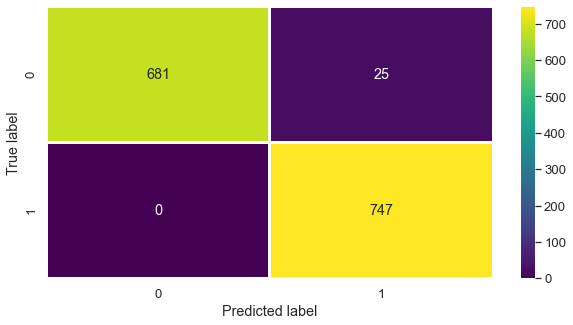

In [67]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

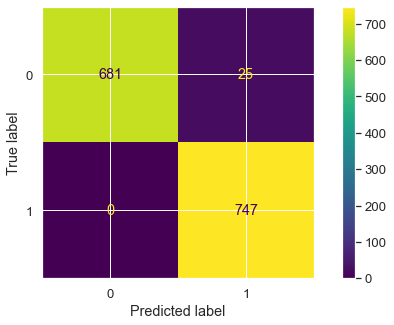

In [68]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       706
           1       0.97      1.00      0.98       747

    accuracy                           0.98      1453
   macro avg       0.98      0.98      0.98      1453
weighted avg       0.98      0.98      0.98      1453



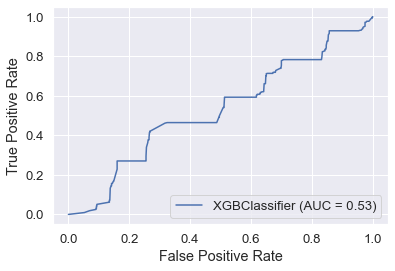

In [70]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [71]:
X.columns

Index(['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG'], dtype='object')

In [72]:
xgbmodel.get_booster().feature_names = ['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']

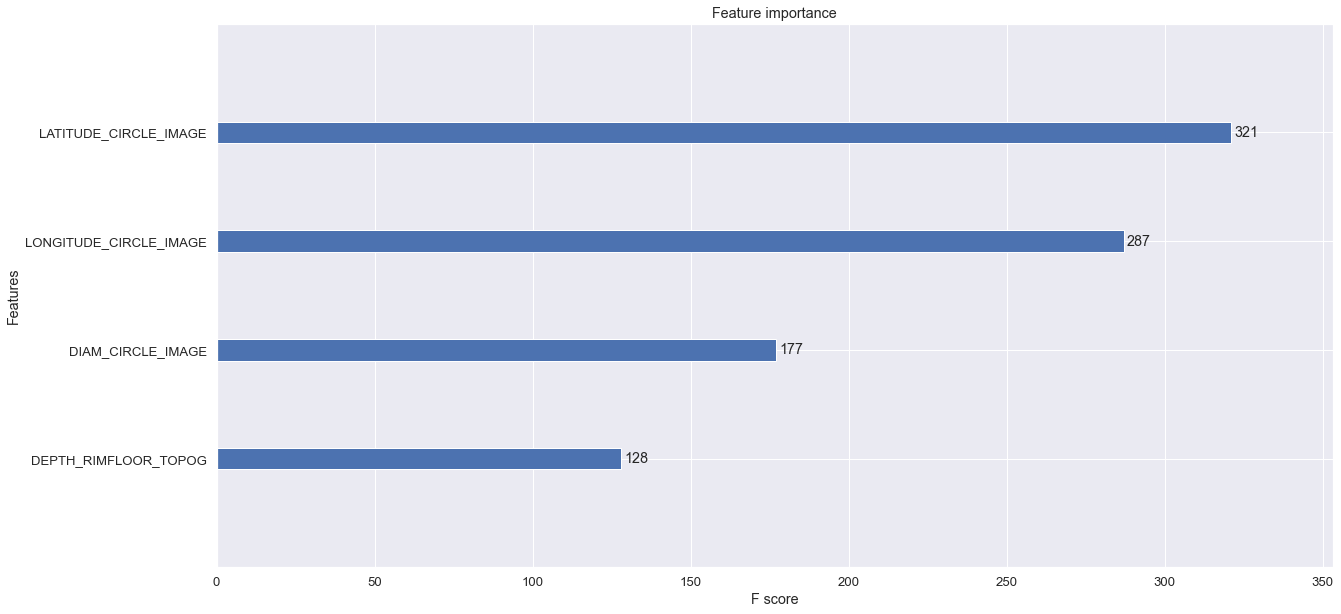

In [73]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [76]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


In [77]:
cv.mean()

0.9588866764195926